# PyDOT Nov 5 2020 Final Project

## Name <span style="color:blue"><i>Teo Jun Keat</i></span>

## Email <span style="color:blue"><i>junkeat_pro@hotmail.com</i></span>

## Project Name <span style="color:blue"><i>Dengue Fever</i></span>

## Problem Statement

<span style="color:blue"><i>Singapore has been busying tackling COVID-19 pandemic since the beginning of 2020. However, there is an huge increase of dengue fever in this year too. Probably most people are staying at home or weather condition?</i></span>

#### <span style="color:blue">Why Dengue Fever?</i></span>
<span style="color:blue"><i> 
    There are plenty of COVID-19 analysis readily available, but there isn't much on dengue fever. 
    Increase number of cases compared to last year</i></span>

## Part 1: Dengue fever among other diseases in Singapore

Installation of library and import them


In [1]:
# install all the dependency for geopandas

'''
pip install wheel
pip install pipwin

pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install fiona
pipwin install pyproj
pipwin install six
pipwin install rtree
pipwin install geopandas
'''

'\npip install wheel\npip install pipwin\n\npipwin install numpy\npipwin install pandas\npipwin install shapely\npipwin install gdal\npipwin install fiona\npipwin install pyproj\npipwin install six\npipwin install rtree\npipwin install geopandas\n'

In [2]:
!pip install descartes

In [3]:
import json
import geojson
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import folium
import re
from datetime import datetime as dt
import matplotlib.dates as mdates
from branca.element import Figure

In [4]:
# import the weekly infectious disease cases in Singapore
df = pd.read_csv('data/weekly-infectious-disease-bulletin-cases.csv')
print(df.shape)
print(df.head())
print(df.tail())

(15420, 3)
   epi_week                  disease  no._of_cases
0  2012-W01  Acute Viral hepatitis B             0
1  2012-W01  Acute Viral hepatitis C             0
2  2012-W01          Avian Influenza             0
3  2012-W01   Campylobacterenterosis             6
4  2012-W01        Chikungunya Fever             0
       epi_week                disease  no._of_cases
15415  2020-W36    Ebola Virus Disease             0
15416  2020-W36  Japanese Encephalitis             0
15417  2020-W36                Tetanus             0
15418  2020-W36               Botulism             0
15419  2020-W36          Murine Typhus             2


In [5]:
# check if any row has any NaN value
df.isna().sum()

epi_week        0
disease         0
no._of_cases    0
dtype: int64

In [6]:
# check for duplicate records
df[df.duplicated()]

,epi_week,disease,no._of_cases


In [7]:
# check the unique value of disease
print(df.disease.unique())

['Acute Viral hepatitis B' 'Acute Viral hepatitis C' 'Avian Influenza'
 'Campylobacterenterosis' 'Chikungunya Fever' 'Cholera' 'Dengue Fever'
 'Dengue Haemorrhagic Fever' 'Diphtheria' 'Encephalitis'
 'Haemophilus influenzae type b' 'Hand, Foot Mouth Disease'
 'Legionellosis' 'Malaria' 'Measles' 'Melioidosis'
 'Meningococcal Infection' 'Mumps' 'Nipah virus infection' 'Paratyphoid'
 'Pertussis' 'Plague' 'Pneumococcal Disease (invasive)' 'Poliomyelitis'
 'Rubella' 'Salmonellosis(non-enteric fevers)' 'SARS' 'Typhoid'
 'Viral Hepatitis A' 'Viral Hepatitis E' 'Yellow Fever'
 'Zika Virus Infection' 'Acute Viral Hepatitis A'
 'Acute Viral Hepatitis E' 'Chikungunya' 'HFMD' 'Nipah'
 'Campylobacter enteritis' 'Leptospirosis' 'Zika' 'Ebola Virus Disease'
 'Japanese Encephalitis' 'Tetanus' 'Botulism' 'Murine Typhus']


In [8]:
# changing the df epi-week column to datetime dtype, and
print(df.dtypes)
df['epi_week'] = df['epi_week'].str.replace('W', '')
df['epi_week'] = pd.to_datetime(df['epi_week'] + '-' + '1', format="%Y-%W-%w")
df.rename(columns={'epi_week':'date'}, inplace=True)
# df.set_index('date', inplace=True)
print(df.dtypes)
print(df.head())

epi_week        object
disease         object
no._of_cases     int64
dtype: object
date            datetime64[ns]
disease                 object
no._of_cases             int64
dtype: object
        date                  disease  no._of_cases
0 2012-01-02  Acute Viral hepatitis B             0
1 2012-01-02  Acute Viral hepatitis C             0
2 2012-01-02          Avian Influenza             0
3 2012-01-02   Campylobacterenterosis             6
4 2012-01-02        Chikungunya Fever             0


We plotted the total number of different diseases cases in each week from 2012 till now. From the graph, there are too many disease with less than 100 counts per week, thus we are filtering those out to get a better overall view.

In [9]:
# set static image in notebook & set darkgrid style
%matplotlib inline
sns.set_style('darkgrid')

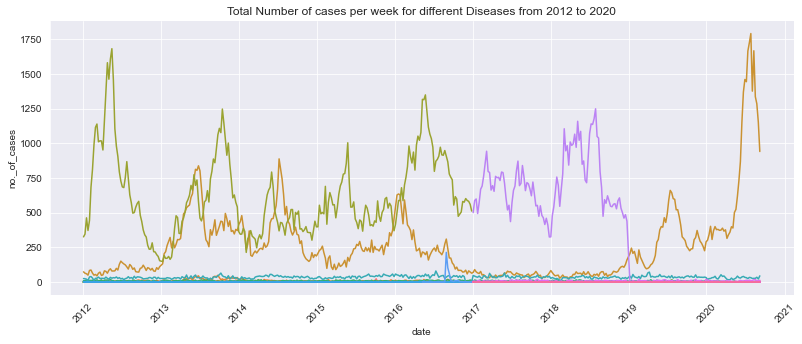

In [10]:
g=sns.relplot(kind='line', data=df, x='date', y='no._of_cases', hue='disease', legend=False, aspect=2.5, height=4.5)
g.set_xticklabels(rotation=45)
g.ax.set_title('Total Number of cases per week for different Diseases from 2012 to 2020')
plt.show()
g.savefig('total_diseases_case_2012_to_2020.png')

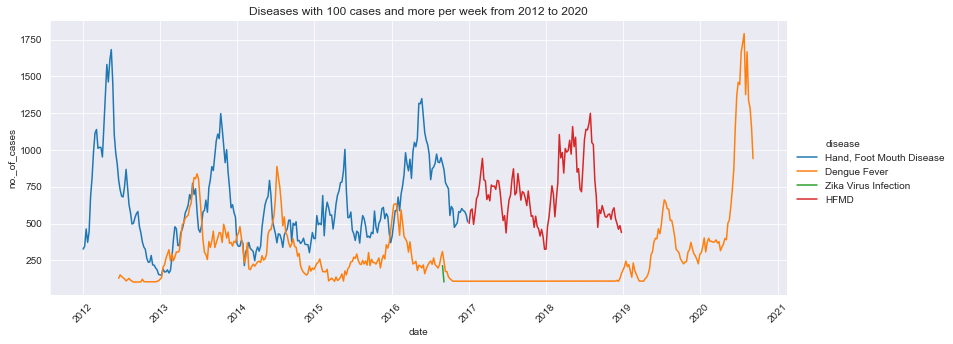

In [11]:
df_filtered = df[df['no._of_cases'] >= 100]
g=sns.relplot(kind='line', x='date', y='no._of_cases', data=df_filtered, hue='disease', aspect=2.5, height=4.5)
g.set_xticklabels(rotation=45)
g.ax.set_title('Diseases with 100 cases and more per week from 2012 to 2020')
plt.show()
g.savefig('diseases_with_more_than_100_cases_2012_to_2020.png')

Showcase the total number of cases for top 5 diseases and others. I have grouped and sum the number of cases for diseases which isn't top 5. Then plot the % using pie chart.

In [12]:
# groupby disease and show the sum of total cases throughout the years
year = df.date.dt.year
df_grouped = df.groupby('disease')[['no._of_cases']].agg(np.sum)\
    .sort_values('no._of_cases', ascending = False).reset_index()
# print(df_grouped)

# copy the df_grouped to extract the top 5
df_grouped_1 = df_grouped[:5].copy()
# print(df_grouped_1)

# combine the rest to be 'others'
df_grouped_2 = pd.DataFrame(data = {
    'disease': ['others'],
    'no._of_cases': [df_grouped['no._of_cases'][5:].sum()]
})
# print(df_grouped_2)

# concat df_grouped_1 and df_grouped_2 together
df_grouped_3 = pd.concat([df_grouped_1,df_grouped_2]).reset_index(drop=True)
# print(df_grouped_3)


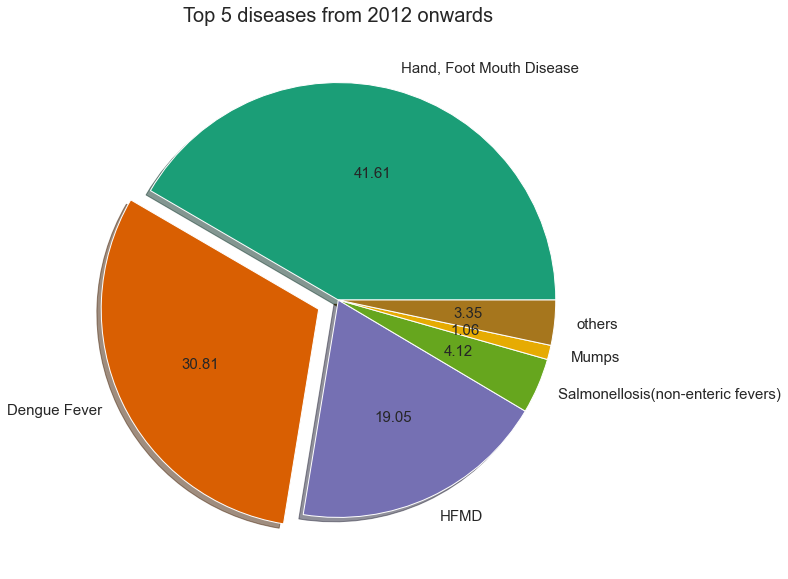

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
theme = plt.get_cmap('Dark2')
ax.set_prop_cycle("color", [theme(1. * i / len(df_grouped_3)) for i in range(len(df_grouped_3))])
_, texts, autotexts =ax.pie(df_grouped_3['no._of_cases'], labels=df_grouped_3['disease'], \
                            autopct='%.2f', shadow=True, explode = (0, 0.1, 0, 0, 0, 0))
for i in texts:
    i.set_fontsize(15)
for j in autotexts:
    j.set_fontsize(15)
ax.set_title('Top 5 diseases from 2012 onwards', fontsize=20)
plt.savefig('top_5_diseases_from_2012_onwards.png')

In [14]:
# Filtering out only dengue fever disease
dengue_df = df[df['disease'].str.contains('Dengue')]
print(dengue_df.disease.unique())
print(dengue_df.count())
dengue_df.head()

['Dengue Fever' 'Dengue Haemorrhagic Fever']
date            906
disease         906
no._of_cases    906
dtype: int64


,date,disease,no._of_cases
6,2012-01-02,Dengue Fever,74
7,2012-01-02,Dengue Haemorrhagic Fever,0
37,2012-01-09,Dengue Fever,64
38,2012-01-09,Dengue Haemorrhagic Fever,2
68,2012-01-16,Dengue Fever,60


Since we are interested the total number of dengue cases, we combine both Dengue Fever and Dengue Haemorrhagic Fever into one.

In [15]:
dengue_df_pivot = pd.pivot_table(dengue_df, index=['date'],values='no._of_cases', aggfunc=np.sum)
dengue_df_pivot.columns=['no._of_dengue_cases']
dengue_df_pivot.reset_index(inplace=True)
dengue_df_pivot

,date,no._of_dengue_cases
0,2012-01-02,74
1,2012-01-09,66
2,2012-01-16,61
3,2012-01-23,52
4,2012-01-30,85
...,...,...
447,2020-08-10,1667
448,2020-08-17,1339
449,2020-08-24,1287
450,2020-08-31,1154


We grouped total dengue cases by year and do a bar plot to observe the trend.
2020 has almost 2 times the number of cases compared to 2019.

   date  no._of_dengue_cases
0  2012                 4632
1  2013                22194
2  2014                18168
3  2015                11461
4  2016                13179
5  2017                 2776
6  2018                 3285
7  2019                15998
8  2020                28220


Text(0.5, 1.0, 'Number of Dengue cases weekly trend from 2012 to 2020')

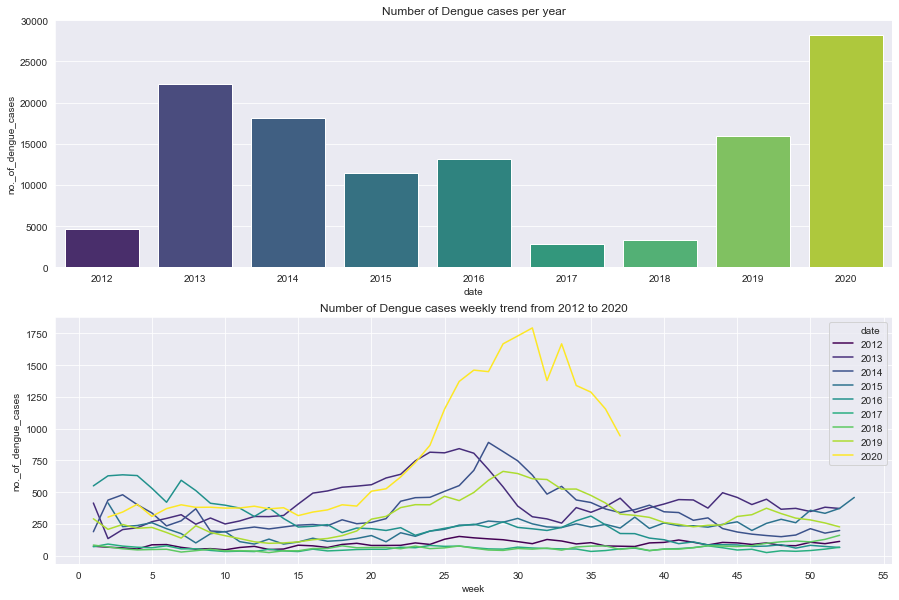

In [16]:
year = dengue_df_pivot.date.dt.year
dengue_df_pivot_grouped = dengue_df_pivot.groupby(year)[['date','no._of_dengue_cases']].agg(np.sum).reset_index()
print(dengue_df_pivot_grouped)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

g1 = sns.barplot(data=dengue_df_pivot_grouped, x='date', y='no._of_dengue_cases', palette="viridis", ax=ax1) # ch:.25
g1.set(ylim=(0,30000))
g1.set_title('Number of Dengue cases per year')

g2 = sns.lineplot(data=dengue_df_pivot, x=dengue_df_pivot.date.dt.isocalendar().week, y='no._of_dengue_cases', \
                  hue=dengue_df_pivot['date'].dt.year, palette='viridis', legend='full', ax=ax2)
g2.xaxis.set_major_locator(ticker.MultipleLocator(5))
g2.set_title('Number of Dengue cases weekly trend from 2012 to 2020')
# ax1.savefig('Number_of_Dengue_cases_2012_to_2020.png')

Let us zoom in to year 2020 to view how serious the dengue fever is. After observing the plot, we did have all-time highest cases - 1800 in a single week. 

        date  no._of_dengue_cases
0 2020-01-06                  303
1 2020-01-13                  343
2 2020-01-20                  404
3 2020-01-27                  309
4 2020-02-03                  370


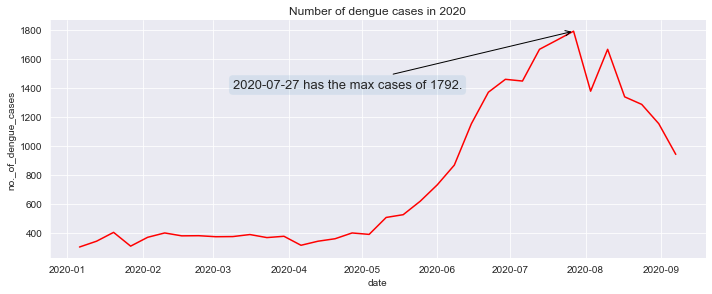

In [17]:
dengue_df_2020 = dengue_df_pivot[dengue_df_pivot.date.dt.year == 2020].reset_index(drop=True)
print(dengue_df_2020.head())

max_x=dengue_df_2020['no._of_dengue_cases'].idxmax()
maximum = dengue_df_2020.iloc[max_x]

g = sns.relplot(kind='line', data=dengue_df_2020, x='date', y='no._of_dengue_cases', \
               aspect=2.5, height=4, color='red')

g.ax.annotate(f'{maximum.iloc[0].date()} has the max cases of {maximum.iloc[1]}.', xy = (maximum.iloc[0], maximum.iloc[1]), \
               xytext=(dengue_df_2020.iloc[9][0], 1400), \
               arrowprops=dict(arrowstyle="->", color='black'), size=13, bbox=dict(boxstyle="round", alpha=0.1))

g.ax.set_title('Number of dengue cases in 2020')
g.savefig('Number_of_dengue_cases_2020.png')


## Part 2: Concentration of Dengue cases around Singapore in the past 14 days

### Dengue cases from different regions in last 14 days

We import datasets from central, north-east, south-east, south-west of Singapore. Using geopandas to read the file, we could see in the description columns of each geopandas geodataframe and extracted 'number of cases' in that particular area. The content is in between <td> and </td>, thus we searched using regex n grab anything that is in between. It is then translate into a new column, 'cases'. Then we added region column specifically for each dataset, and concat all the region datasets into one.

In [18]:
# import geojson data for each region
central_data = gpd.read_file('data/dengue-cases-central-geojson.geojson')
ne_data = gpd.read_file('data/dengue-cases-north-east-geojson.geojson')
se_data = gpd.read_file('data/dengue-cases-south-east-geojson.geojson')
sw_data = gpd.read_file('data/dengue-cases-south-west-geojson.geojson') 

print(central_data)
print(len(central_data))
print(len(ne_data))
print(len(se_data))
print(len(sw_data))

        Name                                        Description  \
0      kml_1  <center><table><tr><th colspan='2' align='cent...   
1      kml_2  <center><table><tr><th colspan='2' align='cent...   
2      kml_3  <center><table><tr><th colspan='2' align='cent...   
3      kml_4  <center><table><tr><th colspan='2' align='cent...   
4      kml_5  <center><table><tr><th colspan='2' align='cent...   
..       ...                                                ...   
154  kml_155  <center><table><tr><th colspan='2' align='cent...   
155  kml_156  <center><table><tr><th colspan='2' align='cent...   
156  kml_157  <center><table><tr><th colspan='2' align='cent...   
157  kml_158  <center><table><tr><th colspan='2' align='cent...   
158  kml_159  <center><table><tr><th colspan='2' align='cent...   

                                              geometry  
0    POLYGON Z ((103.84117 1.35102 0.00000, 103.841...  
1    POLYGON Z ((103.85914 1.31846 0.00000, 103.859...  
2    POLYGON Z ((103.828

In [19]:
print(central_data.isna().sum())
print(ne_data.isna().sum())
print(se_data.isna().sum())
print(sw_data.isna().sum())

Name           0
Description    0
geometry       0
dtype: int64
Name           0
Description    0
geometry       0
dtype: int64
Name           0
Description    0
geometry       0
dtype: int64
Name           0
Description    0
geometry       0
dtype: int64


In [20]:
# view the Description column and focus on the No. of Dengue Cases
central_data.Description[0]

'<center><table><tr><th colspan=\'2\' align=\'center\'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>JOIN_COUNT</th> <td>1</td> </tr><tr bgcolor=""> <th>AREANAME</th> <td>No. of Dengue Cases : 1</td> </tr><tr bgcolor="#E3E3F3"> <th>DETAIL</th> <td>No. of Dengue Cases : 1</td> </tr><tr bgcolor=""> <th>INC_CRC</th> <td>B07F07591934574E</td> </tr><tr bgcolor="#E3E3F3"> <th>FMEL_UPD_D</th> <td>20201014103417</td> </tr></table></center>'

In [21]:
# search and extract the number inside 'No. of Dengue Cases under the Description column'
# using group to return the substring of the search, and use [4:-5] to grab the value between <td> and </td>
central_data['cases'] = central_data.Description.map(lambda x: int(re.search(r'(<td>.*?</td>)', x).group()[4:-5]))
ne_data['cases'] = ne_data.Description.map(lambda x: int(re.search(r'(<td>.*?</td>)', x).group()[4:-5]))
se_data['cases'] = se_data.Description.map(lambda x: int(re.search(r'(<td>.*?</td>)', x).group()[4:-5]))
sw_data['cases'] = sw_data.Description.map(lambda x: int(re.search(r'(<td>.*?</td>)', x).group()[4:-5]))

total_central = sum(central_data['cases'])
total_ne = sum(ne_data['cases'])
total_se = sum(se_data['cases'])
total_sw = sum(sw_data['cases'])
total_cases = sum([total_central,total_ne,total_se, total_sw])
print(total_cases)

737


In [22]:
# inout each dataset with its respective region and concat all 4 datasets into 1
central_data['region'] = 'Central'
ne_data['region'] = 'North east'
se_data['region'] = 'South East'
sw_data['region'] = 'South West'

total_data = pd.concat([central_data, ne_data, se_data, sw_data]).reset_index(drop=True)
print(total_data.head())
total_data.to_file("data/total_data.geojson", driver='GeoJSON')

    Name                                        Description  \
0  kml_1  <center><table><tr><th colspan='2' align='cent...   
1  kml_2  <center><table><tr><th colspan='2' align='cent...   
2  kml_3  <center><table><tr><th colspan='2' align='cent...   
3  kml_4  <center><table><tr><th colspan='2' align='cent...   
4  kml_5  <center><table><tr><th colspan='2' align='cent...   

                                            geometry  cases   region  
0  POLYGON Z ((103.84117 1.35102 0.00000, 103.841...      1  Central  
1  POLYGON Z ((103.85914 1.31846 0.00000, 103.859...      1  Central  
2  POLYGON Z ((103.82859 1.27867 0.00000, 103.828...      1  Central  
3  POLYGON Z ((103.86273 1.32027 0.00000, 103.862...      1  Central  
4  POLYGON Z ((103.79804 1.30399 0.00000, 103.798...      1  Central  


In [23]:
# view the number of cases based on reegion 
grouped = total_data.groupby('region')[['cases']].agg('sum').sort_values('cases',ascending=False)
grouped

,cases
region,
North east,266
Central,208
South East,182
South West,81


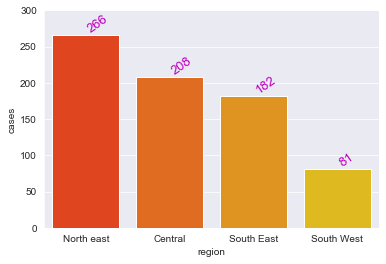

In [24]:
sns.set_style('darkgrid')
g = sns.barplot(x=grouped.index, y='cases', data=grouped, palette='autumn', ci=None)
g.set(ylim=(0, 300))
for index, row in enumerate(grouped["cases"].iteritems()):        
    g.text(index ,row[1], "{:,}".format(row[1]), color='m', va ='bottom', rotation=35, fontsize=13)
# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")
# plt.show()

In [25]:
## extract the coordinates from dengue cases data
# total_data_list = [list(total_data.geometry.exterior[row_id].coords) for row_id in range(total_data.shape[0])]
# total_data_list[-5:]

In [49]:
# # extract the X and Y coordinates from dengue cases data without Z
# total_data_list = []
# for i in range(total_data.shape[0]):
#     inner_list = []
#     for j in range(len(total_data.geometry.exterior[i].coords)):
#         inner_list.append(total_data.geometry.exterior[i].coords[j][0:2])
#     total_data_list.append(inner_list)
# print(total_data_list[:2])


By using geopandas and folium, we could view the regional cases in Singapore map. First, we used featured to cater each subgroup for each region. Then we input the geojson layers and add into the map.

In [27]:
# plot singapore map
sg = [1.3521, 103.8198]
m1 = folium.Map(location=sg, zoom_start=11.5)

In [28]:
from folium import plugins

# all subgroups
all_subgroups = folium.FeatureGroup(name='All Regions')
m1.add_child(all_subgroups)

# subgroup 1
cen = folium.plugins.FeatureGroupSubGroup(all_subgroups, 'Central')
m1.add_child(cen)

# subgroup 2
ne = folium.plugins.FeatureGroupSubGroup(all_subgroups, 'North-East')
m1.add_child(ne)

# subgroup 3
se = folium.plugins.FeatureGroupSubGroup(all_subgroups, 'South-Ease]t')
m1.add_child(se)

# subgroup 4
sw = folium.plugins.FeatureGroupSubGroup(all_subgroups, 'South-West')
m1.add_child(sw)
    
# pull in geojson layers and add to map
# color for each region
# input fields to show number of cases when hover over the area
folium.GeoJson(central_data, style_function=lambda x: {"fillColor": "red", "color": "red"}, tooltip=folium.GeoJsonTooltip(fields=['cases'], aliases=["No. of cases:"])).add_to(cen)
folium.GeoJson(ne_data, style_function=lambda x: {"fillColor": "blue", "color": "blue"}, tooltip=folium.GeoJsonTooltip(fields=['cases'], aliases=["No. of cases:"])).add_to(ne)
folium.GeoJson(se_data, style_function=lambda x: {"fillColor": "orange", "color": "orange"}, tooltip=folium.GeoJsonTooltip(fields=['cases'], aliases=["No. of cases:"])).add_to(se)
folium.GeoJson(sw_data, style_function=lambda x: {"fillColor": "green", "color": "green"}, tooltip=folium.GeoJsonTooltip(fields=['cases'], aliases=["No. of cases:"])).add_to(sw)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(m1)

# display map  
m1

In [29]:
# save the folium map to html
m1.save('dengue_cases_regions.html')

### Dengue clusters against high aedes population in last 14 days

We have obtained dengue cluster dataset and areas with high aedes population dataset in Singapore for the past 14 days.  Observe the relationship between dengue clusters and high aedes population 

In [30]:
# cluster data and the area with high aedes pop 
cluster = gpd.read_file('data/dengue-clusters-geojson.geojson')
high_pop = gpd.read_file('data/areas-with-high-aedes-population-geojson.geojson')

In [31]:
print(cluster.isna().sum())
print(high_pop.isna().sum())
cluster

Name           0
Description    0
geometry       0
dtype: int64
Name           0
Description    0
geometry       0
dtype: int64


,Name,Description,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.85544 1.33222 0.00000, 103.855..."
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.84698 1.34712 0.00000, 103.847..."
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.87309 1.38718 0.00000, 103.873..."
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.81901 1.28869 0.00000, 103.819..."
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.83994 1.29590 0.00000, 103.839..."
...,...,...,...
162,kml_163,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.87877 1.37500 0.00000, 103.880..."
163,kml_164,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.85882 1.38819 0.00000, 103.859..."
164,kml_165,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.86045 1.36932 0.00000, 103.859..."
165,kml_166,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((103.88767 1.39643 0.00000, 103.887..."


In [32]:
# inspect into the cluster & high population dengue description to view what information is useful for extraction
print(cluster.Description[0])
print(high_pop.Description[0])

<center><table><tr><th colspan='2' align='center'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>LOCALITY</th> <td>Kim Keat Ave (Blk 194, 195) / Kim Keat Lk (Blk 242, 243, 247)</td> </tr><tr bgcolor=""> <th>CASE_SIZE</th> <td>5</td> </tr><tr bgcolor="#E3E3F3"> <th>NAME</th> <td>Dengue_Cluster</td> </tr><tr bgcolor=""> <th>HYPERLINK</th> <td>https://www.nea.gov.sg/dengue-zika/dengue/dengue-clusters</td> </tr><tr bgcolor="#E3E3F3"> <th>HOMES</th> <td></td> </tr><tr bgcolor=""> <th>PUBLIC_PLACES</th> <td></td> </tr><tr bgcolor="#E3E3F3"> <th>CONSTRUCTION_SITES</th> <td></td> </tr><tr bgcolor=""> <th>INC_CRC</th> <td>8E5F88C4BECF980D</td> </tr><tr bgcolor="#E3E3F3"> <th>FMEL_UPD_D</th> <td>20201022164116</td> </tr></table></center>
<center><table><tr><th colspan='2' align='center'><em>Attributes</em></th></tr><tr bgcolor="#E3E3F3"> <th>DESCRIPTION</th> <td>FL254- Woodlands Dr 44 / Woodlands Dr 53</td> </tr><tr bgcolor=""> <th>NAME</th> <td>High Aedes Mosquitoes Population Area. Le

In [33]:
# extract the location of the cluster area
cluster['Address'] = cluster.Description.map(lambda x: re.search(r'(<td>.*?</td>)', x).group()[4:-5])
print(cluster.Address[0])

Kim Keat Ave (Blk 194, 195) / Kim Keat Lk (Blk 242, 243, 247)


In [34]:
high_pop['Address'] = high_pop.Description.map(lambda x: re.search(r'(<td>.*?</td>)', x).group()[4:-5])
print(high_pop.Address[0])

FL254- Woodlands Dr 44 / Woodlands Dr 53


In [35]:
# longtitude and langtitude of Singapore is 1.3521° N, 103.8198° E
sg = [1.3521, 103.8198]
m2 = folium.Map(width=900,height=500, location=sg, zoom_start=11.5, max_zoom=17, min_zoom=11)

In [36]:
from folium import plugins

# all subgroups
clus = folium.FeatureGroup(name='Dengue Clusters')
m2.add_child(clus)

hp = folium.FeatureGroup(name='High Aedes Pop. Areas')
m2.add_child(hp)
    
# pull in geojson layers and add to map
# color for each region
# input fields to show number of cases when hover over the area
folium.GeoJson(cluster, style_function=lambda x: {"fillColor": "blue", "color": "blue"}, tooltip=folium.GeoJsonTooltip(fields=['Address'], aliases=["Location:"])).add_to(clus)
folium.GeoJson(high_pop, style_function=lambda x: {"fillColor": "red", "color": "red"}, tooltip=folium.GeoJsonTooltip(fields=['Address'], aliases=["Location:"])).add_to(hp)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(m2)

# display map  
m2

In [37]:
# save the folium map to html
m2.save('cluster_vs_high_aedes_population_areas.html')

## Part 3: Factors affecting Dengue outbreak

Using verious datasets such as number of rain days, amount of rainfall, mean humidity, mean temperature and sunshine duration observed monthly, we could use to analysize any linear relationship to the number of dengue cases.

In [38]:
# input the datasets, concat them and extract year 2012 onwards
rain_days = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv', parse_dates=['month'], index_col='month')
rainfall = pd.read_csv('data/rainfall-monthly-total.csv', parse_dates=['month'], index_col='month')
humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv', parse_dates=['month'], index_col='month')
temperature = pd.read_csv('data/surface-air-temperature-monthly-mean.csv', parse_dates=['month'], index_col='month')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv', parse_dates=['month'], index_col='month')

total_1 = pd.concat([rain_days, rainfall, humidity, temperature, sunshine_duration], axis=1)
total_1.index.rename('date', inplace=True)
total_2 = total_1[total_1.index.year >=2012]
print(total_2.head())

            no_of_rainy_days  total_rainfall  mean_rh  mean_temp  \
date                                                               
2012-01-01                16           106.1     87.3       26.7   
2012-02-01                11            83.6     85.6       27.2   
2012-03-01                21           313.4     87.3       27.0   
2012-04-01                20           260.6     85.1       27.6   
2012-05-01                19           292.0     83.1       28.2   

            mean_sunshine_hrs  
date                           
2012-01-01                6.0  
2012-02-01                7.0  
2012-03-01                4.2  
2012-04-01                5.8  
2012-05-01                5.6  


In [39]:
# shift the data 14 days later due to mosquito breeding duration and incubation period of disease
# then resample the data from weekly to monthly to sum it up
dengue_df_pivot.set_index('date', inplace=True)
dengue_df_pivot_copy = dengue_df_pivot.copy()
dengue_df_pivot_copy['no._of_dengue_cases + 14'] = dengue_df_pivot_copy['no._of_dengue_cases'].shift(2)
print(dengue_df_pivot_copy.head())

dengue_df_shifted = dengue_df_pivot_copy.resample('MS').sum()
dengue_df_shifted

            no._of_dengue_cases  no._of_dengue_cases + 14
date                                                     
2012-01-02                   74                       NaN
2012-01-09                   66                       NaN
2012-01-16                   61                      74.0
2012-01-23                   52                      66.0
2012-01-30                   85                      61.0


,no._of_dengue_cases,no._of_dengue_cases + 14
date,,
2012-01-01,338,201.0
2012-02-01,258,289.0
2012-03-01,231,216.0
2012-04-01,363,332.0
2012-05-01,338,329.0
...,...,...
2020-05-01,2042,1657.0
2020-06-01,5584,3898.0
2020-07-01,6636,5946.0


In [40]:
# concat all the datasets together 
total_3 = pd.concat([total_2, dengue_df_shifted], axis=1)
total_3

,no_of_rainy_days,total_rainfall,mean_rh,mean_temp,mean_sunshine_hrs,no._of_dengue_cases,no._of_dengue_cases + 14
date,,,,,,,
2012-01-01,16,106.1,87.3,26.7,6.0,338,201.0
2012-02-01,11,83.6,85.6,27.2,7.0,258,289.0
2012-03-01,21,313.4,87.3,27.0,4.2,231,216.0
2012-04-01,20,260.6,85.1,27.6,5.8,363,332.0
2012-05-01,19,292.0,83.1,28.2,5.6,338,329.0
...,...,...,...,...,...,...,...
2020-05-01,16,255.6,79.1,28.9,5.7,2042,1657.0
2020-06-01,21,233.8,80.2,28.1,4.3,5584,3898.0
2020-07-01,22,140.8,78.2,27.9,5.7,6636,5946.0


,no_of_rainy_days,total_rainfall,mean_rh,mean_temp,mean_sunshine_hrs,no._of_dengue_cases,no._of_dengue_cases + 14
no_of_rainy_days,1.000000,0.753388,0.653330,-0.376084,-0.735935,-0.019024,-0.064300
total_rainfall,0.753388,1.000000,0.626171,-0.491658,-0.689796,-0.037322,-0.057322
mean_rh,0.653330,0.626171,1.000000,-0.647746,-0.561442,-0.190916,-0.226619
mean_temp,-0.376084,-0.491658,-0.647746,1.000000,0.404534,0.188890,0.170458
mean_sunshine_hrs,-0.735935,-0.689796,-0.561442,0.404534,1.000000,0.025309,0.051147
no._of_dengue_cases,-0.019024,-0.037322,-0.190916,0.188890,0.025309,1.000000,0.969875
no._of_dengue_cases + 14,-0.064300,-0.057322,-0.226619,0.170458,0.051147,0.969875,1.000000


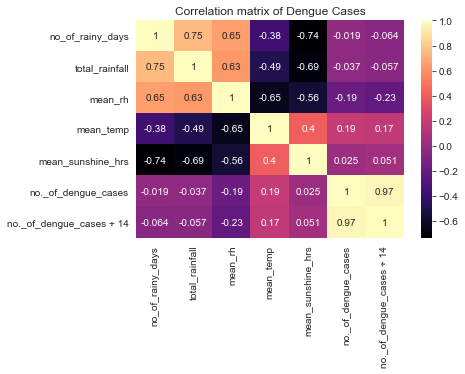

In [41]:
# using heatmap to see any linear relationship
g = sns.heatmap(total_3.corr(), cmap='magma', annot=True)
g.set_title('Correlation matrix of Dengue Cases')
g.figure.savefig('Correlation_matrix_Dengue_Cases.png')
total_3.corr()

As observed, the number of dengue cases has 0.19 correlation with mean temperature. Temperature affects the growth of aedes mosquitoes, it can neither be too low or too high. The mosquitoes will grow well in an ideal of temperature between 25°C to 27°C. 

There are various reasons why there are so few linearly relationship:
* they could be non-linear relationship
* higher rainfall could have more waterbody for breeding, but also increase the chance of larvae off the containers
* the ratio of female vs male aedes mosquitoes
* humidity and wind could affect the evaporation of their breeding sites, and wind could affect mosquitoes ability to find host
* life cycle of aedes mosquitoes and incubation could be longer
* other factors such as clearing of waterbody in our house could have a larger correlation.

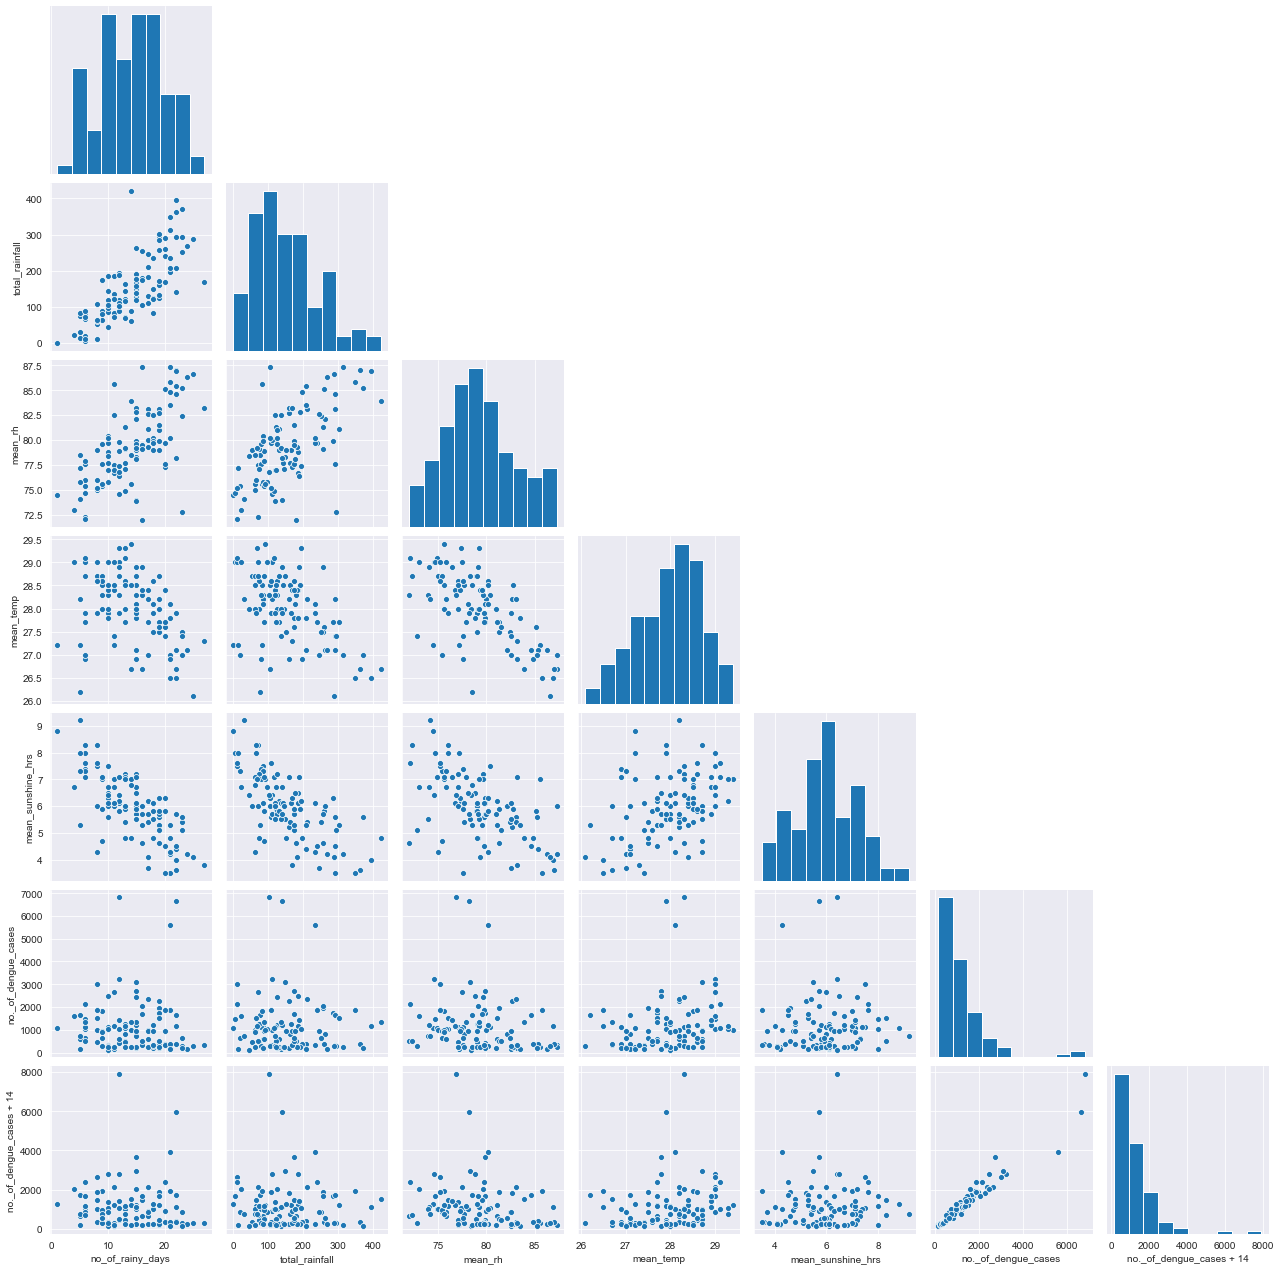

In [51]:
g = sns.pairplot(total_3, corner=True)
plt.show()
g.savefig('Pairplots_Dengue_Cases.png')